# Introduction

This notebook is intended to be a **gentle introduction** into the topic of **dimensionality reduction**. This is a powerful technique used to explore the structure of high-dimensional data (i.e. lots of features) in a lower dimensional subspace. 

For example, if a data set has 1000 dimensions/features, there is no way for us to visualise that data in 1000 dimenions because as humans we live and interact in a 3D world.  However, we will see that there are ways to plot a meaningful representation of the data in 2 or 3 dimensions. 

In this notebook we will cover:

**Unsupervised methods:**
* PCA
* t-SNE
* UMAP

**Clustering techniques:**
* k-Means

# Libraries

In [1]:
# Core
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
import umap
import umap.plot

# Data

We will be working with a wine dataset, which contains **13 features** describing **3 different wine types**. We don't know which types are which, so we will start by using unsupervised learning (i.e. untagged data) to explore this dataset.

In [2]:
# Training data
data=pd.read_csv('../input/wine-dataset-for-clustering/wine-clustering.csv')

# Dimensions
print('Dataframe dimensions:',data.shape)

# First 5 entries of training data
data.head()

Dataframe dimensions: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**EDA**

In [3]:
print(f'Missing values in dataset: {data.isna().sum().sum()}')
print('')
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')
print('')
print(f'Data types: {data.dtypes.unique()}')

Missing values in dataset: 0

Duplicates in dataset: 0, (0.0%)

Data types: [dtype('float64') dtype('int64')]


**Preprocessing**

It is good practice to scale our data, so that we don't bias our methods later on. 

In [4]:
# This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
X=pd.DataFrame(SS.fit_transform(data), columns=data.columns)

# PCA

**Principal Component Analysis (PCA)** was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as **1901**. It is very popular because it is **fast**, **easy to implement** and **easy to interpret**. 

PCA works by finding a low dimensional subspace that **maximises the variance** of the data in that subspace and performing a **linear projection**. This basically means the data will be as **spread out** as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

In [5]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


The new columns are called **Principal Components** (PC's) and give the coordinates of the data in the new smaller space. 

**PCA plot in 2D**

Text(0, 0.5, 'PC2')

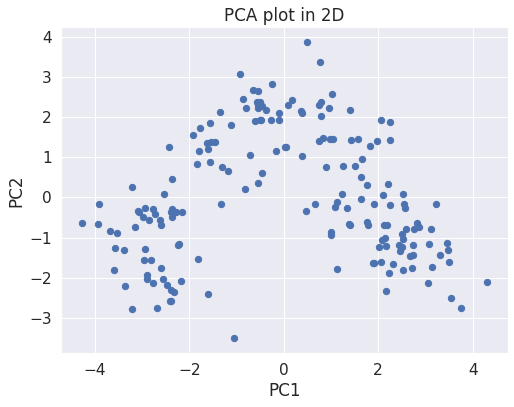

In [6]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

*Notes:*
* Notice how these points have **no colours** (yet) because we don't know what their classes are. This is what makes it an **unsupervised method**.
* We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by **clustering** the data into 3 groups using techniques such as **k-Means**. 

# k-Means clustering

**k-Means** is an **iterative** clustering algorithm that works as follows:
1. Choose coordinates (e.g. randomly) for the locations of the k centroids.
2. Group datapoints together by finding the nearast centroid. (There will always be k goups).
3. Calculate the new centre of each centroid by taking the mean position of datapoints in each group.
4. Iterative until the centroids stop moving by a significant amount.

k-Means is popular because it is a **reliable** (always converges) and **relatively fast** algorithm. The main downside is that you have to decide what the value of k should be beforehand. (Although there are techniques to help with this). 

In [7]:
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

**PCA plot in 2D coloured by cluster**

Text(0, 0.5, 'PC2')

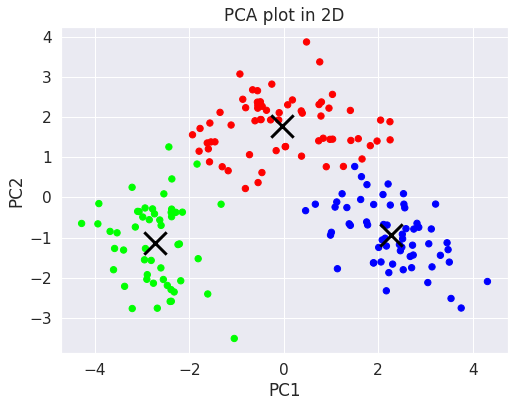

In [8]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# PCA continued

With a little bit more effort, we can do the same in 3D! 

**PCA plot in 3D**

In [9]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

**Explained variance**

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how **important** each additional **principal component** is to the original data representation.

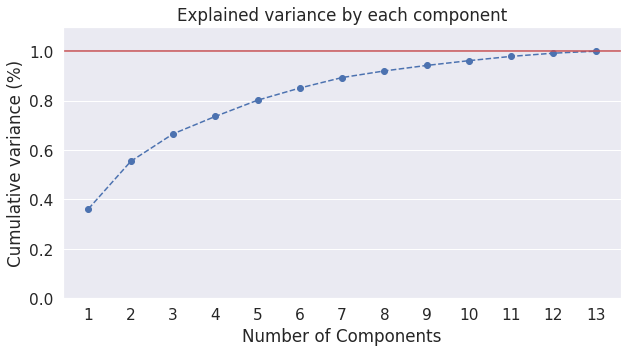

In [10]:
# PCA
pca_var = PCA()
pca_var.fit(X)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

It is interesting to see that with just **2 components** we capture **over 50%** of the variance. And by moving up to **3 components**, we get **2 thirds** of the variance.

For this reason, sometimes PCA is used for **feature selection**. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA. The number of components is normally chosen by looking at the explained variance graph (e.g. a minimum of 60% might be required).

# t-SNE

**t-SNE** (pronounced tiz-knee), which stands for **t-distributed Stochastic Neighbor Embedding** was proposed much more recently by Laurens van der Maaten and Geoffrey Hinton in their [2008 paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). 
This works in a similar way to PCA but has some key differences:
* Firstly, this is a **stochastic method**. So if you run multiple t-SNE plots on the same dataset it can look different.
* Another difference is that this is an **iterative method**. It works by repeatedly moving datapoints closer or further away from each other depending on how 'similar' they are. 
* The new representation is **non-linear**. This makes it harder to interpret but it can be very effective at 'unravelling' highly non-linear data.

The main downside to t-SNE is that is **very slow** compared to the other dimensionality techniques. This is because it makes calculations on a pair-wise basis, which does not scale well with large datasets.

In [11]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,6.916076,12.323521
1,7.104231,6.632320
2,10.911669,9.942618
3,10.124999,12.703660
4,11.497008,6.029367


**t-SNE plot in 2D coloured by class**

Like PCA, t-SNE is an **unsupervised algorithm**, however we will use the same k-Means clusters from before to colour code the data points. 

Text(0, 0.5, 'tsne component 2')

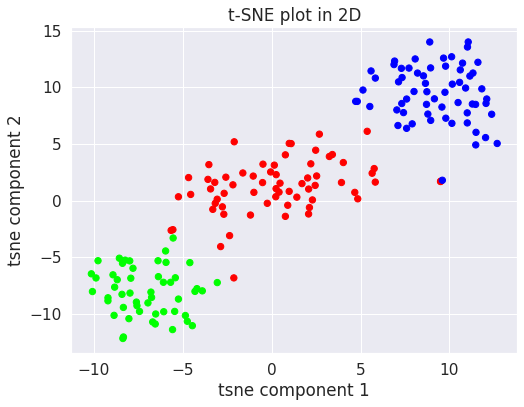

In [12]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

We can't plot the centroids like last time because t-SNE has no transform attribute, i.e. `tsne.transform(X)` does not exist. This is because t-SNE is an iterative method and does not learn a single repeatable transformation.

**t-SNE plot in 3D**

In [13]:
# t-SNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components_tsne, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='t-SNE plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

If you run this cell several times, you will see that the 3D t-SNE plot looks quite different each time.

# UMAP

**UMAP**, which stands for **Uniform Manifold Approximation and Projection** was proposed by Leland McInnes, John Healy and James Melville in their [2018 paper](http://gobie.csb.pitt.edu/SML/umap.pdf).

It is similar to t-SNE in that it learns a non-linear mapping that preserves clusters but its main advantage is that it is **significantly faster**. It also tends to do better at preserving global structure of the data compared to t-SNE. 

Reference: https://pair-code.github.io/understanding-umap/ 

In [14]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(X)           # we'll use X_fit later
X_umap = um.transform(X)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(178, 2)


,umap comp. 1,umap comp. 2
0,12.132236,4.624349
1,11.207399,5.402526
2,11.977618,6.088167
3,12.975411,5.657119
4,10.844329,6.844327


**UMAP plot in 2D coloured by clusters**

Text(0, 0.5, 'umap component 2')

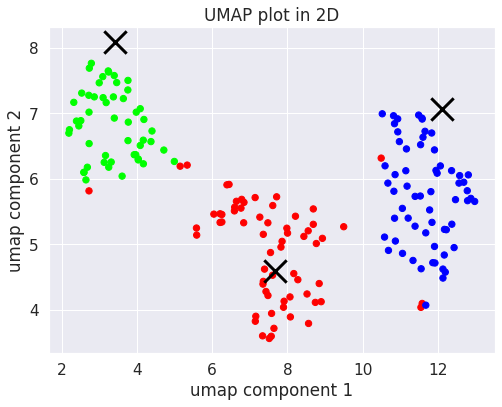

In [15]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Centroids
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

*Notes:*
1. We see that the positions of the clusters are closer to what they are like in the PCA plot. This is what we mean by saying the global structure is better preserved.
2. UMAP does have a transform attribute so we can plot the centroids on the graph too.

**UMAP plot in 3D**

In [16]:
# UMAP
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components_umap, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

Doesn't that look amazing? Compare it with the 3D PCA and 3D t-SNE plots.

**UMAP connectivity plot**

UMAP can also be represented as a **connected graph**, which can be useful to get insights into the topolical embedding. Currently this function is only available in 2D.

<AxesSubplot:>

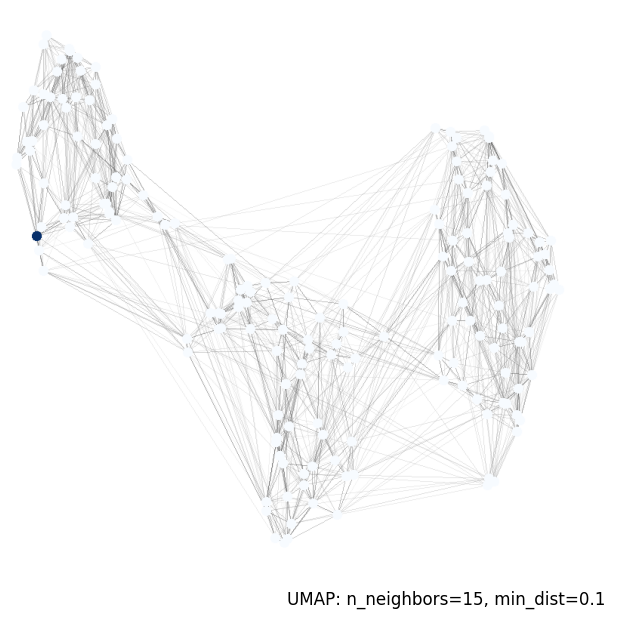

In [17]:
# Connectivity plot
umap.plot.connectivity(X_fit, show_points=True)

/opt/conda/lib/python3.7/site-packages/umap/plot.py:855: UserWarning:

Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!



<AxesSubplot:>

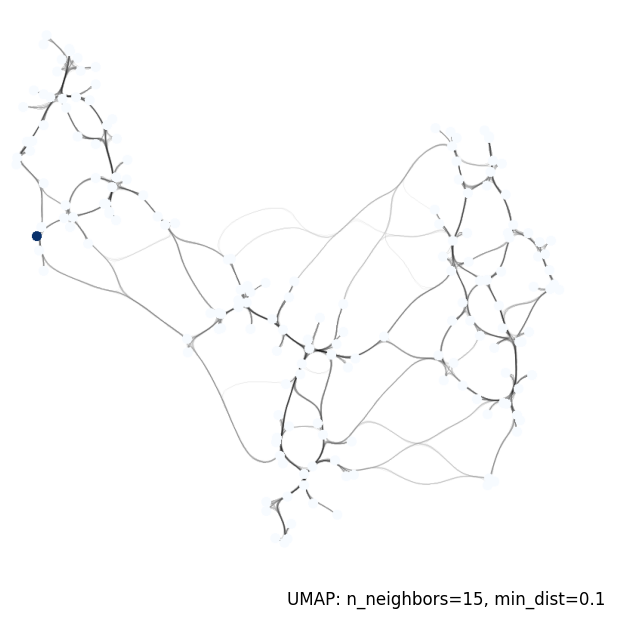

In [18]:
# Bundling can provide a simplified view of the connections
umap.plot.connectivity(X_fit, show_points=True, edge_bundling='hammer')

Thank you for reading!